# Capstone Project - Music Data Analysis - Clustering

In [125]:
# Usual imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [126]:
df = pd.read_csv('FinalData.csv', sep=',')
df.head()

,ID,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Artists,Popularity
0,6J2VvzKwWc2f0JP5RQVZjq,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,celticmetal,The HU,55
1,4HA34COgxgVJ6zK88UN4Ik,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,celticmetal,Gloryhammer,21
2,3W6Xik6Xxf06JuUoZSATlD,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,celticmetal,Orion's Reign,2
3,2gGveBaLJQMtJ43X4UL5kH,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,celticmetal,Brothers of Metal,50
4,1lRF81A1C9QoCgBcEop2zg,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,celticmetal,Powerwolf,22


In [127]:
# Just to make sure, we check if there are any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121815 entries, 0 to 121814
Data columns (total 18 columns):
ID                  121815 non-null object
Name                121815 non-null object
Danceability        121815 non-null float64
Energy              121815 non-null float64
Key                 121815 non-null float64
Loudness            121815 non-null float64
Mode                121815 non-null float64
Speechness          121815 non-null float64
Acousticness        121815 non-null float64
Instrumentalness    121815 non-null float64
Liveness            121815 non-null float64
Valence             121815 non-null float64
Tempo               121815 non-null float64
Duration_ms         121815 non-null float64
time_signature      121815 non-null float64
Genre               121815 non-null object
Artists             121808 non-null object
Popularity          121815 non-null int64
dtypes: float64(13), int64(1), object(4)
memory usage: 16.7+ MB


In [128]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121808 entries, 0 to 121814
Data columns (total 18 columns):
ID                  121808 non-null object
Name                121808 non-null object
Danceability        121808 non-null float64
Energy              121808 non-null float64
Key                 121808 non-null float64
Loudness            121808 non-null float64
Mode                121808 non-null float64
Speechness          121808 non-null float64
Acousticness        121808 non-null float64
Instrumentalness    121808 non-null float64
Liveness            121808 non-null float64
Valence             121808 non-null float64
Tempo               121808 non-null float64
Duration_ms         121808 non-null float64
time_signature      121808 non-null float64
Genre               121808 non-null object
Artists             121808 non-null object
Popularity          121808 non-null int64
dtypes: float64(13), int64(1), object(4)
memory usage: 17.7+ MB


In [129]:
# Eliminating 3 out the 4 categorical columns - because we don't really need them for the analyses.
# Eliminating the ID, Name and Artists column. 
df = df.drop(columns = ['ID', 'Name', 'Artists'])
df.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Popularity
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,celticmetal,55
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,celticmetal,21
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,celticmetal,2
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,celticmetal,50
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,celticmetal,22


In [130]:
df_sample = df[0:10000]
df_sample.shape

(10000, 15)

In [131]:
new_sample = pd.get_dummies(df_sample)
cols = new_sample.columns
for i in range(0, len(cols)):
    print(cols[i])

Danceability
Energy
Key
Loudness
Mode
Speechness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
time_signature
Popularity
Genre_albanianhiphop
Genre_balkantrap
Genre_balletclass
Genre_belgianpop
Genre_canadianpop
Genre_celticmetal
Genre_deepchill-out
Genre_deepcomedy
Genre_dronemetal
Genre_e6fi
Genre_ghanaianhiphop
Genre_groovemetal
Genre_khmer
Genre_lapop
Genre_modernblues
Genre_ostrock
Genre_persiantraditional
Genre_pianoblues
Genre_portuguesefolk
Genre_psychill
Genre_runefolk
Genre_slovakindie
Genre_slovakrock


In [132]:
# We will work on a copy of the original DF, so that we ahve the original data intact, for later reference (if needed)
masked_df = df.copy()

# We get the features based on the getDummies() method, to convert the categorical 'Genre' column into features with binary values.
masked_df = pd.get_dummies(masked_df)
masked_df.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
       ...
       'Genre_welshchoir', 'Genre_welshindie', 'Genre_welshmetal',
       'Genre_westernmassindie', 'Genre_witchhouse', 'Genre_worship',
       'Genre_wrock', 'Genre_yugoslavrock', 'Genre_zapstep', 'Genre_zeuhl'],
      dtype='object', length=639)

### We have fully numerical data, with the 'Genre' column transformed into features. 

In [133]:
masked_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121808 entries, 0 to 121814
Columns: 639 entries, Danceability to Genre_zeuhl
dtypes: float64(13), int64(1), uint8(625)
memory usage: 86.5 MB


### Now to apply K-Means on our data

In [134]:
# Imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import time

In [135]:
data = masked_df[0:10000].values
type(data)

numpy.ndarray

time taken: 60.363184452056885


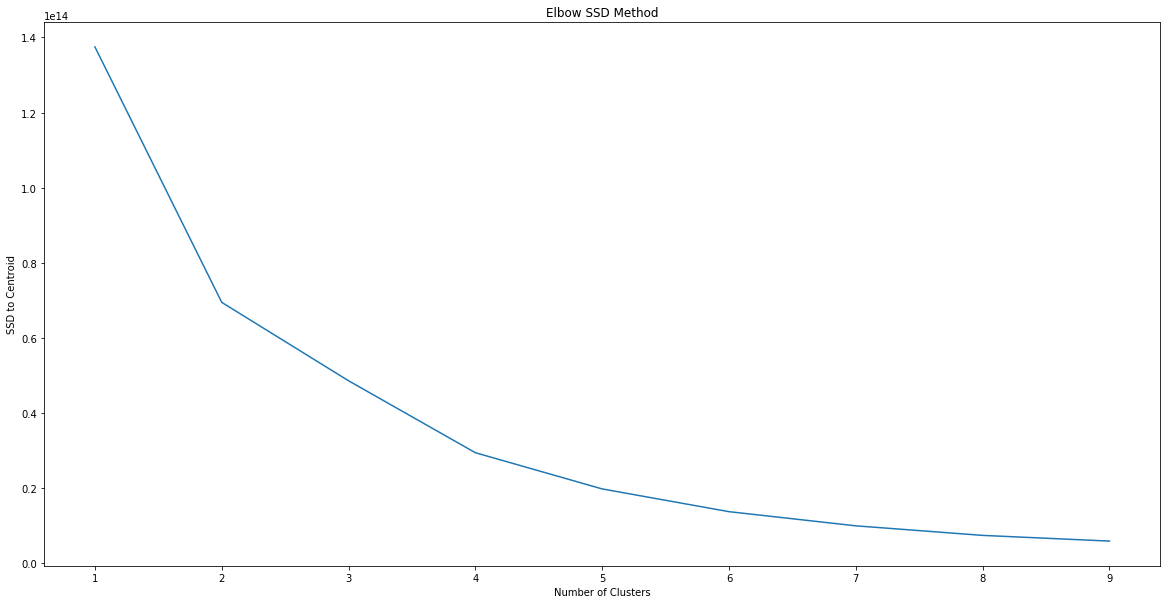

In [136]:
# test
k_range = range(1, 10)

sumOfSquares = []
labels = []

start = time.time()

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    x = model.predict(data)
    labels.append(x)
    y = model.inertia_
    sumOfSquares.append(y)
    
end = time.time()
print("time taken:", end - start)

plt.plot(k_range, sumOfSquares)
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD to Centroid")
plt.title("Elbow SSD Method")
plt.show()

time taken: 1068.3652973175049


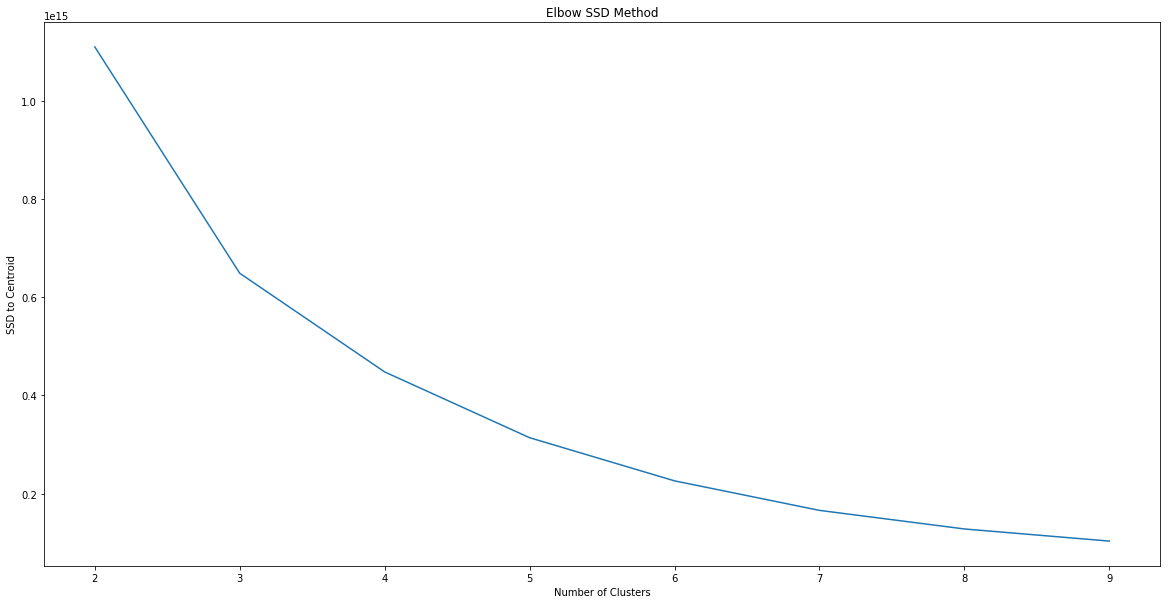

In [73]:
# We can start with an arbitrary value of K upto 10. 

data = masked_df.values

k_range = range(2, 10)

sumOfSquares = []
labels = []

start = time.time()

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    labels.append(model.predict(data))
    sumOfSquares.append(model.inertia_)
    
end = time.time()
totalTime = end - start
print("time taken:", totalTime)

plt.plot(k_range, sumOfSquares)
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD to Centroid")
plt.title("Elbow SSD Method")
plt.show()

time taken: 3981.929925441742


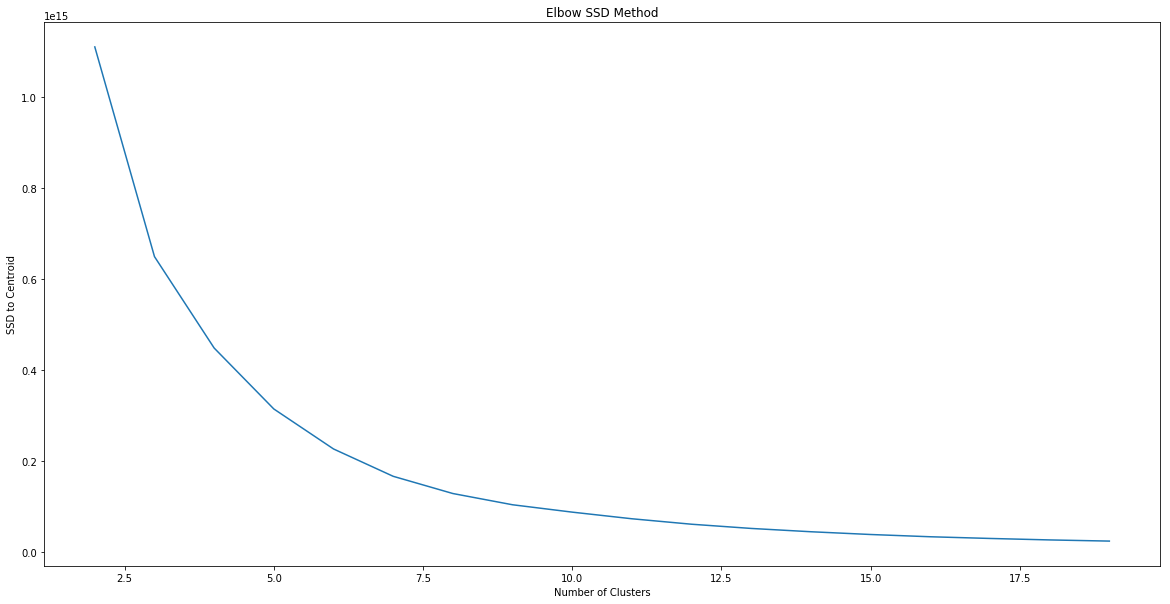

In [31]:
# We can start with an arbitrary value of K upto 20. 

data = masked_df.values

k_range = range(2, 20)

sumOfSquares = []
labels = []

start = time.time()

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    labels.append(model.predict(data))
    sumOfSquares.append(model.inertia_)
    
end = time.time()
totalTime = end - start
print("time taken:", totalTime)

plt.plot(k_range, sumOfSquares)
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD to Centroid")
plt.title("Elbow SSD Method")
plt.show()

In [32]:
print("time taken for 20 clusters: ", totalTime/60, " mins")

time taken for 20 clusters:  66.36549875736236  mins


### Inferences based on the "Elbow" method:
* Though there does seem to be an "elbow" like curve, there isn't a clear inflection point.
* Based on the curve, we could choose anywhere between 5 and 10 clusters.
* Since the variability reduces overall, near around 10, we could choose K = 10.

In [137]:
# Continuing on with K = 10
data = masked_df.values

start = time.time()

model = KMeans(n_clusters=10)
model.fit(data)
y_predicted = model.predict(data)
cc = model.cluster_centers_
sse = model.inertia_
labels = model.labels_

end = time.time()
totalTime = end - start

In [138]:
print("time taken for 10 clusters: ", totalTime/60, " mins")

time taken for 10 clusters:  3.6717144807179767  mins


In [139]:
len(y_predicted)

121808

In [140]:
masked_df.shape

(121808, 639)

In [141]:
print(cc)
len(cc)

[[ 5.66858191e-01  6.70031967e-01  5.30520792e+00 ...  1.12239744e-04
   1.43105674e-03  2.41315450e-03]
 [ 5.48796620e-01  6.51627743e-01  5.52404363e+00 ...  5.28548559e-19
   9.69276742e-17  1.02934399e-02]
 [ 4.74351905e-01  3.96552857e-01  5.55238095e+00 ...  1.76182853e-19
   5.42101086e-19  4.76190476e-02]
 ...
 [ 5.76080865e-01  6.59383206e-01  5.30263671e+00 ...  5.99934007e-05
   1.16987131e-03  2.18975913e-03]
 [ 3.37064819e-01  5.12946780e-01  5.46481876e+00 ...  3.65918233e-19
   5.42101086e-19  4.90405117e-02]
 [ 4.51000820e-01  5.84368060e-01  5.35907336e+00 ...  4.82625483e-04
  -4.02239006e-17  2.55791506e-02]]


10

In [142]:
print(labels)
len(labels)

[3 3 7 ... 7 7 0]


121808

In [143]:
sse

87347707333345.34

In [144]:
data.shape

(121808, 639)

In [145]:
data[0:5, 0:19]

array([[ 6.24000e-01,  8.57000e-01,  1.00000e+01, -6.25000e+00,
         0.00000e+00,  5.42000e-02,  2.08000e-02,  2.06000e-01,
         1.10000e-01,  3.24000e-01,  1.31926e+02,  2.82920e+05,
         4.00000e+00,  5.50000e+01,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 5.17000e-01,  9.16000e-01,  0.00000e+00, -4.93300e+00,
         1.00000e+00,  5.59000e-02,  1.82000e-04,  1.91000e-03,
         3.06000e-01,  4.44000e-01,  1.35996e+02,  3.00320e+05,
         4.00000e+00,  2.10000e+01,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 2.51000e-01,  8.94000e-01,  8.00000e+00, -4.10300e+00,
         0.00000e+00,  5.70000e-02,  1.44000e-02,  0.00000e+00,
         1.23000e-01,  2.97000e-01,  1.14223e+02,  1.75353e+05,
         4.00000e+00,  2.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 4.69000e-01,  7.43000e-01,  1.00000e+00, -5.57000e+00,
         0.0000

In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [150]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data)
principalDF = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
principalDF.head()

,Principal Component 1,Principal Component 2
0,28138.775970,9.230578
1,45538.776487,14.420926
2,-79428.223114,-7.139812
3,17510.776211,-35.568965
4,-16848.223485,4.206332


In [151]:
finalDF = principalDF.copy()
finalDF['Cluster'] = y_predicted
finalDF.head()

,Principal Component 1,Principal Component 2,Cluster
0,28138.775970,9.230578,3
1,45538.776487,14.420926,3
2,-79428.223114,-7.139812,7
3,17510.776211,-35.568965,3
4,-16848.223485,4.206332,0


In [152]:
finalDF.shape

(121808, 3)

In [153]:
finalDF.describe()

,Principal Component 1,Principal Component 2,Cluster
count,1.218080e+05,1.218080e+05,121808.000000
mean,-8.373110e-11,2.074007e-14,3.593163
std,1.281652e+05,2.897149e+01,2.914086
min,-2.512052e+05,-1.237154e+02,0.000000
25%,-6.371422e+04,-2.218517e+01,0.000000
50%,-2.518122e+04,-7.875705e-01,3.000000
75%,3.227178e+04,1.765969e+01,7.000000
max,5.695105e+06,1.267573e+02,9.000000


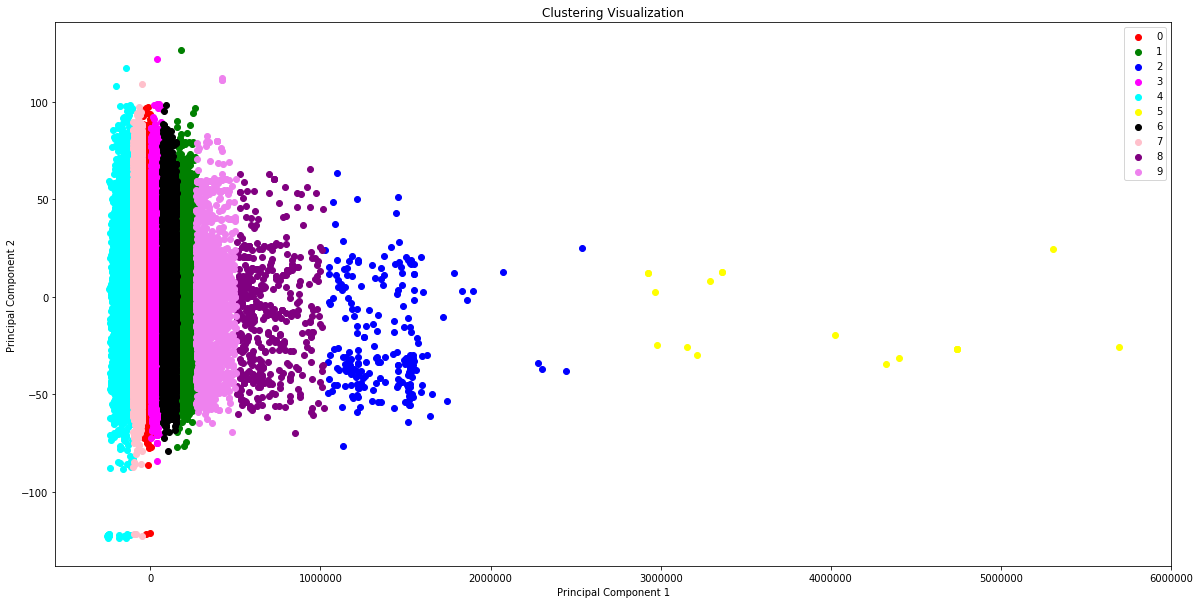

In [155]:
colors = ['red', 'green', 'blue', 'magenta', 'cyan', 'yellow', 'black', 'pink', 'purple', 'violet']

# targets also called labels
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for target, color in zip(targets, colors):
    inds = finalDF.Cluster == target
    plt.scatter(finalDF.loc[inds, 'Principal Component 1'], finalDF.loc[inds, 'Principal Component 2'], c = color)
  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.legend(targets)
plt.show()

* We see that the clusters seem to split well within vertical boundaries, with little to no overlap. 
* Except for cluster 0 which overlaps behind clusters 7 and 3, everything else separates out quite well.

#### Let us visualize the internal data columns using a correlation heatmap. 

In [157]:
# We have our original data
data = df.copy()
data.head(20)

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Popularity
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.3240,131.926,282920.0,4.0,celticmetal,55
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.4440,135.996,300320.0,4.0,celticmetal,21
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.2970,114.223,175353.0,4.0,celticmetal,2
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.4810,86.953,272292.0,4.0,celticmetal,50
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.3290,125.993,237933.0,4.0,celticmetal,22
5,0.430,0.797,2.0,-5.907,0.0,0.0303,0.000308,0.056600,0.323,0.3520,147.982,262719.0,4.0,celticmetal,51
6,0.434,0.908,6.0,-4.715,1.0,0.0936,0.007910,0.000000,0.662,0.4610,126.331,173213.0,4.0,celticmetal,37
7,0.308,0.965,8.0,-3.172,1.0,0.0591,0.000023,0.064800,0.117,0.1890,175.036,317733.0,4.0,celticmetal,55
8,0.500,0.925,4.0,-3.467,0.0,0.0378,0.000940,0.000000,0.294,0.3720,92.988,234787.0,4.0,celticmetal,40
9,0.479,0.977,2.0,-4.515,1.0,0.0860,0.000017,0.000053,0.298,0.1390,150.010,285925.0,4.0,celticmetal,40


In [190]:
def calculate_pvalues(df, alpha=0.05):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [191]:
pvals_df = calculate_pvalues(data)
pvals_df

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Popularity
Danceability,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Energy,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Key,0,0,0,0,0,0,0,0.5113,0.3802,0,0.2832,0.0005,0,0.1702
Loudness,0,0,0,0,0.0001,0,0,0,0,0,0,0,0,0
Mode,0,0,0,0.0001,0,0,0,0,0.0006,0,0,0,0,0.1183
Speechness,0,0,0,0,0,0,0.0001,0,0,0,0,0,0.6274,0.0003
Acousticness,0,0,0,0,0,0.0001,0,0,0,0,0,0,0,0
Instrumentalness,0,0,0.5113,0,0,0,0,0,0,0,0.0039,0,0,0
Liveness,0,0,0.3802,0,0.0006,0,0,0,0,0.3741,0,0,0.8478,0
Valence,0,0,0,0,0,0,0,0,0.3741,0,0,0,0,0


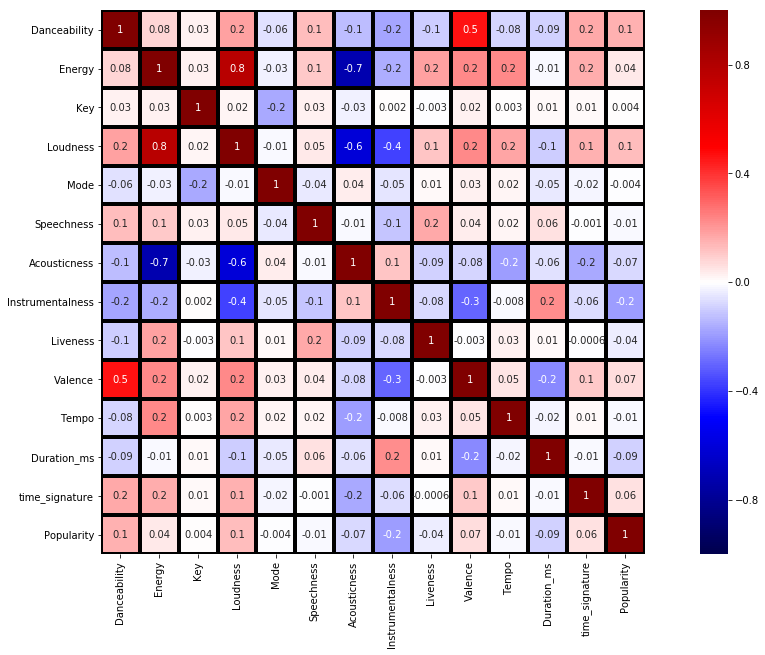

In [184]:
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='seismic', linewidths=3, linecolor='black', square=True)

**We see a lot fo strong positive and negative correlations.**
1. Danceability is correlated with Valence = 0.5
2. Energy is correlated with Loudness = 0.8
3. Energy is anticorrelated with Acousticness = -0.7 
4. Loudness is anticorrelated with Acousticness = -0.6

Given these strong positive and negative correlations, we can find statistical significance between these. 
And then examine them within the clusters.

In [192]:
corr1, p1 = stats.pearsonr(data.Danceability, data.Valence)
print("\ncorr1, p1: ", corr1, p1)
corr2, p2 = stats.pearsonr(data.Energy, data.Loudness)
print("\ncorr2, p2: ", corr2, p2)
corr3, p3 = stats.pearsonr(data.Energy, data.Acousticness)
print("\ncorr3, p3: ", corr3, p3)
corr4, p4 = stats.pearsonr(data.Loudness, data.Acousticness)
print("\ncorr4, p4: ", corr4, p4)



corr1, p1:  0.46795744383373217 0.0

corr2, p2:  0.7782060793825529 0.0

corr3, p3:  -0.724143241788365 0.0

corr4, p4:  -0.6048936528698426 0.0


In [195]:
data['Cluster'] = y_predicted
data.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Popularity,Cluster
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,celticmetal,55,3
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,celticmetal,21,3
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,celticmetal,2,7
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,celticmetal,50,3
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,celticmetal,22,0


In [217]:
data.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Popularity,Cluster
count,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,121808.000000,1.218080e+05,121808.000000,121808.000000,121808.000000
mean,0.552998,0.648142,5.311704,-8.552079,0.615838,0.083429,0.269317,0.236781,0.193199,0.466353,121.945146,2.547812e+05,3.903586,25.198961,3.593163
std,0.183774,0.246486,3.568934,4.808460,0.486398,0.099541,0.323437,0.355858,0.162385,0.265853,28.957195,1.281652e+05,0.414441,22.474217,2.914086
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.576000e+03,0.000000,0.000000,0.000000
25%,0.430000,0.486000,2.000000,-10.408000,0.000000,0.036100,0.007440,0.000002,0.095000,0.242000,99.988000,1.910670e+05,4.000000,4.000000,0.000000
50%,0.566000,0.690000,5.000000,-7.398000,1.000000,0.048500,0.103000,0.001830,0.125000,0.455000,121.015000,2.296000e+05,4.000000,21.000000,3.000000
75%,0.693000,0.853000,9.000000,-5.354000,1.000000,0.083200,0.483000,0.532000,0.246000,0.680000,139.939000,2.870530e+05,4.000000,42.000000,7.000000
max,0.988000,1.000000,11.000000,5.056000,1.000000,0.966000,0.996000,0.999000,1.000000,1.000000,248.066000,5.949886e+06,5.000000,96.000000,9.000000


In [218]:
# Lets examine the means of all features across clusters, and try to isolate some differences
targets = np.arange(0,10)

means = {}

for k in targets:
    means[k] = data[data.Cluster == k].describe().iloc[1, :]

In [223]:
print(means.get(4))
print("\n")
print(means.get(7))
print("\n")
print(means.get(7) - means.get(4))

Danceability             0.526683
Energy                   0.552737
Key                      5.178447
Loudness               -10.734574
Mode                     0.679298
Speechness               0.100883
Acousticness             0.450501
Instrumentalness         0.325504
Liveness                 0.202698
Valence                  0.528578
Tempo                  120.848245
Duration_ms         121799.575114
time_signature           3.831855
Popularity              20.314521
Cluster                  4.000000
Name: mean, dtype: float64


Danceability             0.576102
Energy                   0.659395
Key                      5.302446
Loudness                -7.879620
Mode                     0.634539
Speechness               0.085361
Acousticness             0.276690
Instrumentalness         0.145148
Liveness                 0.193167
Valence                  0.532713
Tempo                  122.201412
Duration_ms         185634.430788
time_signature           3.914989
Popularity         

We see that between neighboring clusters 4 and 7, there are **subtle** differences in some features such as:
1. Danceability
2. Mode
3. Speechness
4. Liveness
5. Popularity

There are **strong** differences in:
1. Energy
2. Loudness
3. Acousticness
4. Instrumentalness
5. Tempo
6. Duration_ms

Let's cross verify between 2 more sets of clusters, 1 set far apart and another set that's close to each other, similar to 4 and 7

Cluster 4 and Cluster 9 - Far apart

In [224]:
print(means.get(4))
print("\n")
print(means.get(1))
print("\n")
print(means.get(1) - means.get(4))

Danceability             0.526683
Energy                   0.552737
Key                      5.178447
Loudness               -10.734574
Mode                     0.679298
Speechness               0.100883
Acousticness             0.450501
Instrumentalness         0.325504
Liveness                 0.202698
Valence                  0.528578
Tempo                  120.848245
Duration_ms         121799.575114
time_signature           3.831855
Popularity              20.314521
Cluster                  4.000000
Name: mean, dtype: float64


Danceability             0.548837
Energy                   0.651631
Key                      5.524578
Loudness               -10.104655
Mode                     0.560522
Speechness               0.070020
Acousticness             0.187185
Instrumentalness         0.602759
Liveness                 0.191947
Valence                  0.294697
Tempo                  123.839135
Duration_ms         456175.170353
time_signature           3.896313
Popularity         

All the subtle and strong differences hold good for these clusters as well.

Let us look at another set of close by cluster such as 2 and 8, which clustered a little differently from the others.

In [225]:
print(means.get(2))
print("\n")
print(means.get(8))
print("\n")
print(means.get(2) - means.get(8))

Danceability        4.743519e-01
Energy              3.965529e-01
Key                 5.552381e+00
Loudness           -1.598391e+01
Mode                5.523810e-01
Speechness          5.981829e-01
Acousticness        8.114151e-01
Instrumentalness    3.438327e-01
Liveness            3.153881e-01
Valence             3.278457e-01
Tempo               9.680060e+01
Duration_ms         1.622745e+06
time_signature      3.695238e+00
Popularity          8.128571e+00
Cluster             2.000000e+00
Name: mean, dtype: float64


Danceability             0.337065
Energy                   0.512947
Key                      5.464819
Loudness               -13.102232
Mode                     0.577825
Speechness               0.115323
Acousticness             0.371469
Instrumentalness         0.595264
Liveness                 0.218337
Valence                  0.178085
Tempo                  112.107569
Duration_ms         930911.978678
time_signature           3.823028
Popularity              11.289979


Here, with the exception of Speechness, which has a more pronounced difference instead of subtle, and Energy which has more of a smaller difference instead of large, all other differences hold as they should.

Given this we can see that the clustering algorithm weighs some of the features lower - the ones with subtle differences, and weighs the ones with strong differences a lot higher.

Let's look at some clusters far apart, one tall and thin, one short and wide, say 4 and 8

In [292]:
print(means.get(4))
print("\n")
print(means.get(8))
print("\n")
print(means.get(4) - means.get(8))

Danceability             0.526683
Energy                   0.552737
Key                      5.178447
Loudness               -10.734574
Mode                     0.679298
Speechness               0.100883
Acousticness             0.450501
Instrumentalness         0.325504
Liveness                 0.202698
Valence                  0.528578
Tempo                  120.848245
Duration_ms         121799.575114
time_signature           3.831855
Popularity              20.314521
Cluster                  4.000000
Name: mean, dtype: float64


Danceability             0.337065
Energy                   0.512947
Key                      5.464819
Loudness               -13.102232
Mode                     0.577825
Speechness               0.115323
Acousticness             0.371469
Instrumentalness         0.595264
Liveness                 0.218337
Valence                  0.178085
Tempo                  112.107569
Duration_ms         930911.978678
time_signature           3.823028
Popularity         

We can see that they vary quite a bit in the key features listed above.

In [308]:
print(means.get(4))
print("\n")
print(means.get(2))
print("\n")
print(means.get(4) - means.get(2))

Danceability             0.526683
Energy                   0.552737
Key                      5.178447
Loudness               -10.734574
Mode                     0.679298
Speechness               0.100883
Acousticness             0.450501
Instrumentalness         0.325504
Liveness                 0.202698
Valence                  0.528578
Tempo                  120.848245
Duration_ms         121799.575114
time_signature           3.831855
Popularity              20.314521
Cluster                  4.000000
Name: mean, dtype: float64


Danceability        4.743519e-01
Energy              3.965529e-01
Key                 5.552381e+00
Loudness           -1.598391e+01
Mode                5.523810e-01
Speechness          5.981829e-01
Acousticness        8.114151e-01
Instrumentalness    3.438327e-01
Liveness            3.153881e-01
Valence             3.278457e-01
Tempo               9.680060e+01
Duration_ms         1.622745e+06
time_signature      3.695238e+00
Popularity          8.128571e+00

Now, let us also look at the clustering w.r.t Genres:

Cluster 9 onwards it seems to start getting wider along the 1st PC and shorter along the 2nd PC, i.e., 9, 8, 2 and 5 are the ones that seem a little different from the other clusters, in the visualization.
Let's examine their means as well as their Genre differences.

In [261]:
# Clusters 9 onwards i.e., 9, 8, 2 and 5 are the ones that seem a little different from the other clusters, in the visualization
clus9 = np.unique(data[data.Cluster == 9].Genre)
clus8 = np.unique(data[data.Cluster == 8].Genre)
clus2 = np.unique(data[data.Cluster == 2].Genre)
clus5 = np.unique(data[data.Cluster == 5].Genre)
print(len(clus9))
print(len(clus8))
print(len(clus2))
print(len(clus5))

264
105
29
10


In [279]:
clus9_pop = np.mean(data[data.Cluster == 9].Popularity)
clus8_pop = np.mean(data[data.Cluster == 8].Popularity)
clus2_pop = np.mean(data[data.Cluster == 2].Popularity)
clus5_pop = np.mean(data[data.Cluster == 5].Popularity)
print(clus9_pop)
print(clus8_pop)
print(clus2_pop)
print(clus5_pop)

15.978281853281853
11.289978678038379
8.128571428571428
12.277777777777779


We see that the average Popularity among these clusters is also quite low. Let us extract the unique genres across these 4 clusters and compare them to the other group of clusters. Let's call this group of clusters - **9, 8 , 2 and 5** as **collection A**

In [284]:
# appending 2 at a time, since it throws a typeError otherwise
a = np.append(clus5, clus2)
b = np.append(clus9, clus8)
collectionA = np.unique(np.append(a, b))
print(len(collectionA))
pop_mean_collA = (clus9_pop + clus8_pop + clus2_pop + clus5_pop)/4
print(pop_mean_collA)

276
11.918652434417359


We see that the average popularity across collection A Genres is only 11.91, which is quite low. 

We'll call the other group of clusters (4, 7, 3, 6, 1 and 0) as **collection B**.

Let us compare the average Popularities between both groups, and the Genres across both (and the ones that might exist in both groups)

In [287]:
clus4 = np.unique(data[data.Cluster == 4].Genre)
clus7 = np.unique(data[data.Cluster == 7].Genre)
clus3 = np.unique(data[data.Cluster == 3].Genre)
clus6 = np.unique(data[data.Cluster == 6].Genre)
clus1 = np.unique(data[data.Cluster == 1].Genre)
clus0 = np.unique(data[data.Cluster == 0].Genre)
print(len(clus4))
print(len(clus7))
print(len(clus3))
print(len(clus6))
print(len(clus1))
print(len(clus0))

544
614
604
546
444
618


In [288]:
clus4_pop = np.mean(data[data.Cluster == 4].Popularity)
clus7_pop = np.mean(data[data.Cluster == 7].Popularity)
clus3_pop = np.mean(data[data.Cluster == 3].Popularity)
clus6_pop = np.mean(data[data.Cluster == 6].Popularity)
clus1_pop = np.mean(data[data.Cluster == 1].Popularity)
clus0_pop = np.mean(data[data.Cluster == 0].Popularity)
print(clus4_pop)
print(clus7_pop)
print(clus3_pop)
print(clus6_pop)
print(clus1_pop)
print(clus0_pop)

20.314521186061096
27.593098274568643
24.7031242681156
20.662804381279987
18.589861751152075
28.226258942348156


We can already see that the Popularities are in a higher range in this group of clusters, as compared to the ones in collection A. 

We also see that these clusters keep reducing in the number of unique Genres that exist within the cluster as they go along from 9 through 8, 2 and 5 (order as seen in the visualization), with cluster 9 being the closest to the other group of clusters (4, 7, 3, 6, 1, 0), in cluster height and width, along with the number of unique genres.

In [291]:
# appending 2 at a time, since it throws a typeError otherwise
c = np.append(clus4, clus7)
d = np.append(clus3, clus6)
e = np.append(clus1, clus0)
cd = np.append(c, d)
collectionB = np.unique(np.append(cd, e))
print(len(collectionB))
pop_mean_collB = (clus4_pop + clus7_pop + clus3_pop + clus6_pop + clus1_pop + clus0_pop)/6
print(pop_mean_collB)

625
23.348278133920928


This is interesting - collection B spans over **ALL** the genres that exist in the data set. But it's mean Popularity is higher than that of collection A.

The total number of genres across the data set is 625.

Collection B has all of them, whereas collection A has only a subset of them - 276.

Lets look at the Popularities and Genres - existing in clusters 2 and 5 - the last ones.

In [298]:
print(clus2)
print(clus5)

['africangospel' 'britishcomedy' 'canadianclassical' 'canterburyscene'
 'chineseopera' 'classicalpercussion' 'danishclassical' 'deeplatinjazz'
 'depressiveblackmetal' 'dronefolk' 'dronemetal' 'earlyavantgarde'
 'icelandicpop' 'irishclassical' 'jazzfusion' 'mallet' 'martialindustrial'
 'microtonal' 'minimaltechno' 'moog' 'norwegianmetal' 'organicambient'
 'persiantraditional' 'rosary' 'scratch' 'steampunk' 'vintagechanson'
 'vintageradioshow' 'zeuhl']
['darkblackmetal' 'deepdeephouse' 'depressiveblackmetal' 'dronefolk'
 'dronemetal' 'organicambient' 'post-blackmetal' 'tropicalhouse'
 'vintagechanson' 'vintageradioshow']


It looks like a varied bunch of very abstract genres, such as **depressiveblackmetal, darkblackmetal, africangospel, scratch, dronemetal, jazzfusion, deeplatinjazz** etc. 

Let's take a closer look at depressiveblackmetal and jazzfusion across our data set and see how many of their tracks fall in collection B as well.

In [307]:
depbm = data[data.Genre == 'depressiveblackmetal']
jf = data[data.Genre == 'jazzfusion']
print("\nTotal no of tracks in depressiveblackmetal: ", len(depbm))
print("\nTotal no of tracks in jazzfusion: ", len(jf))

# clusters in collection A
clustersA = [9, 8, 2, 5]

# clusters in collection B
clustersB = [4, 7, 3, 6, 1, 0]

depbmB = 0
jfB = 0
for i in clustersB:
    val1 = len(depbm[depbm.Cluster == i])
    val2 = len(jf[jf.Cluster == i])
    depbmB += val1
    jfB += val2

print("\nTotal no of tracks in Collection B of depressiveblackmetal: ", depbmB)
print("\nTotal no of tracks in Collection B of jazzfusion: ", jfB)


Total no of tracks in depressiveblackmetal:  130

Total no of tracks in jazzfusion:  665

Total no of tracks in Collection B of depressiveblackmetal:  89

Total no of tracks in Collection B of jazzfusion:  640


**Conclusion:** Based on the analyses seen above, we conclude the following things for our vertical:

* Along with other weighted features listed above, the Popularity metric also plays an important role in the clustering. Given a range of feature values for the other features - Danceability, Instrumentalness, Duration_ms etc., the Genres are clustered with the Popularity metric such that the more Popular it is, it clusters the track to the left, with taller clusters and less width, but as Popularity diminishes (in combination with variations in other features), it is more likely to get assigned to clusters in Collection A - shorter and wider.

* The metrics listed further above which have subtle and strong variations between clusters, also vary depending on the cluster. Some of them go up as it moves towards low popularity, and also vary within the groups (A or B). This fluctuation within their collective groups (A or B) can also be seen to 

* The Genre has only a limited bearing on the cluster assignment, the "low popularity" genres seen above have songs that exist in large numbers in collection B as well (the higher popularity clusters). This only means that given that they tend to exist in collection A (lower popularity clusters) **also**, we can say that those 276 genres/subgenres would also tend to be less lucrative as they can very easily lose popularity. 